<center> 
    <h1 style="font-size:36px;">The Crypto Craze - A Mirroring of the Dot Com Bubble?</h1>
    <h4>Meehan Imam</h4>
</center>

<h1>Introduction</h1>

In the final months of 2020, the world began to take notice of the massive potential of blockchain technology - most notably, cryptocurrencies. Bitcoin, the most valuable and first cryptocurrency was created in 2009 by an anonymous person or croup going under name Satoshi Nakamoto. The purpose was to create a decentralized currency existing completely seperately from existing financial systems, offering a "secure" store of value and form of exchange. Since then thousands of blockchain projects have arised, each preaching the value that they bring. Initially amateur and individual investors comprised the majority of the market, leading to a massive bull run and quick crash in 2017. 

2020 is the year that the mainstream world, serious investors, and even governments have taken notice of cryptocurrencies. It's not uncommon to hear people around you talking about a random altcoins they are buying, swearing that it will be the next big thing and make them rich. Some of the most popular coins are based solely on memes, having no real value beyond name and being some degree of decentralized. A parallel to this phenomenon is the dot com bubble of the 1990's. This was the beginning of the age of the internet, with thousands of new internet based companies popping up.

Similar to crypto, people were buying any stock with a "dot com" associated to it. People recounted reports of getting gas, when friendly patrons would rave about this internet based stock that was going to make them rich. Unfortunately for these enthusastic investors in the early internet the dot com bubble burst in 2000, with the NASDAQ Composite index falling 78%. This parallel raises the question, is the cryptocurrency market in a bubble and will it end the same way? As of May 2022, Bitcoin is down roughly 50% from it's high of $64,000 in November 2021. 

In this project I will compare and contrast the market data of the stock market during the dot com bubble to the crypto market in recent years. The goal is to determine whether or not they are similar. If they are, then investors in crypto can keep this in mind when determining what their next move will be and taken lessons from those who made mistakes during the dot com bubble. 

The libraries used in this project include:
 - <a href="https://pandas.pydata.org/pandas-docs/stable/" />pandas
 - <a href="https://numpy.org/doc/https://numpy.org/doc/" />numpy
 - <a href="https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.html" />matplotlib pyplot
 - <a href="https://docs.python.org/3/library/datetime.html" />datetime
 - <a href="https://scikit-learn.org/0.21/documentation.html"> sklearn </a>
    - Preprocessing
    - Linear Model
    - Polynomial Features

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

<h1>1. Gathering and Examining the Data</h1>

First, lets look at historical stock market and crypto prices to see if there are any similarities worth exploring. 

The dot com bubble was stated to have started in 1990, and the crash happened in 2000. The NASDAQ Composite index tracks the nearly all of the stocks listed on the NASDAQ exchange, and is heavily weighted towards the information technology sector. For this reason, it was very sensitive to the dot com bubble. Lets get a full picture of what happened before and after with weekly price data from 1994 to 2002 downloaded from <a href="https://finance.yahoo.com/">Yahoo Finance.</a>

Available to from the Yahoo Finance data, we have the following columns:
 - Date
 - Open
 - High
 - Low
 - Close
 - Volume
 
For the purposes of plotting prices, we will use close price agains date. It is common practice for financial analysts to use close prices for plotting, so we will do the same.

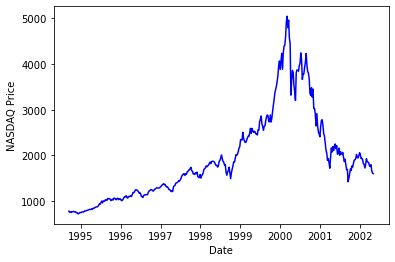

In [57]:
# Use pandas to read in the csv file for the data
NASDAQ = pd.read_csv("NASDAQ_weekly_1994-2002.csv")

# Because Yahoo Finance provide date in the form of a string, use the datetime library to convert 
# the strings into a datetime object that pyplot can intepret.
for index in NASDAQ.index:
    NASDAQ.at[index, "Date"] = dt.datetime.strptime(NASDAQ.at[index, "Date"],'%Y-%m-%d').date()

    
# Use the pyplot module to create a plot of Date on the x axis and Close on the y axis
fig, ax = plt.subplots()

ax1.set_xlabel('Date')
ax1.set_ylabel('NASDAQ Price', color='black')
plot = ax1.plot(NASDAQ["Date"], NASDAQ["Close"], color='blue')

plt.show()

Here we can see that bubble fully begins to form around late 1998, where the price begins to increase rapidly. In 2000 the price begins to fall and tapers off by 2002. Lets compare this with the crypto market.

Unfortunately, there aren't any major composite indices that track crypto prices the same way the NASDAQ composite does. All indices currently offered track market capitalization of the currencies in the index, which doesn't offer a fair point of comparison. However, an interesting feature of the cryptocurrency market is that major price action for nearly all currency follows the major movements of Bitcoin. This is due to the fact that Bitcoin is the first mover and largest cryptocurrency by market cap. For this reason, the sentiment of the market is largely determined by Bitcoin price. Therefore, its fair to use Bitcoin price to represent the crypto market when comparing to the stock market.

The earliest Bitcoin pricing data available on Yahoo Finance is starting in 2014. This gives us a time frame of roughly 8 years, which is the same time frame of the pricing data for NASDAQ. 

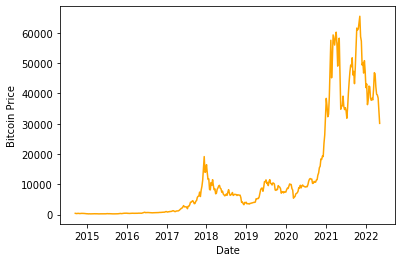

In [58]:
# The same operations are used for the Bitcoin chart.
BITCOIN = pd.read_csv("BTC-USD.csv")

for index in BITCOIN.index:
    BITCOIN.at[index, "Date"] = dt.datetime.strptime(BITCOIN.at[index, "Date"],'%Y-%m-%d').date()
    
fig, ax = plt.subplots()

ax.set_xlabel('Date')
ax.set_ylabel('Bitcoin Price', color='black')
plot = ax.plot(BITCOIN["Date"], BITCOIN["Close"], color='orange')

plt.show() 

We can see that there are similarities in that there is a large rise and fall in prices. To better compare, lets plot the two charts together. Since the prices are on different scales, we can use a twin axis plot to really be able to examine similarities. We also drop the first 200 weeks in both dataframes, as the most relevant pricing data for the bubble remains in the latter half of these two charts.

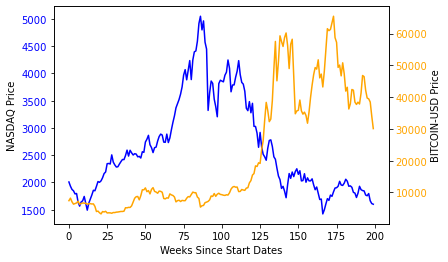

In [3]:
# Use the pandas drop function on a slice to create a new dataframe without the for 200 rows.
nasdaq_200 = NASDAQ.drop(NASDAQ.index[0:200])
bitcoin_200 = BITCOIN.drop(BITCOIN.index[0:200])

# Our new x axis will be a count of the number of weeks, since we have different timelines.
weeks1 = range(0, 200)

fig, ax1 = plt.subplots()

ax1.set_xlabel('Weeks Since Start Dates')
ax1.set_ylabel('NASDAQ Price', color='black')
plot_1 = ax1.plot(weeks1, nasdaq_200["Close"], color='blue')
ax1.tick_params(axis ='y', labelcolor = 'blue') 

# Create a twin axis for bitcoin, and plot them together.
ax2 = ax1.twinx() 
  
ax2.set_ylabel('BITCOIN-USD Price', color = 'black') 
plot_2 = ax2.plot(weeks1, bitcoin_200["Close"], color = 'orange') 
ax2.tick_params(axis ='y', labelcolor = 'orange')                     

plt.show()

Lets examine two charts above. Clearly, both crypto and NASDAQ had meteoric rises to sharp peaks and rapid declines. Because we are earlier on in the crypto market, the Bitcoin rise is shifted ahead of NASDAQ by roughly 100 weeks. If Bitcoin follows the dot com history, it will continue its sharp decline into a low and steady its price movement. Aside from this, we really can't draw any conclusions about the similarities, and what might happen to bitcoin. 

<h1>2. Exploratory Analysis</h1>
Lets look at some more metrics. First lets look at the percentage changes in price on a 5 week basis in a bar chart. We use a 5 week basis because we want to see the major percentage change movements. In addition, the bar chart will be easier to interpret with less noise in the data.

In [93]:
# Create a copy of the original df, as we will be dropping intervals.
nasdaq_int = nasdaq_200.copy()
bitcoin_int = bitcoin_200.copy()

# Simply loop through and drop 5 weeks, iterating 5 indexes at a time.
for index in range(0, 200, 5):
    nasdaq_int.drop(nasdaq_int.index[index:(index + 5)], inplace=True)
    bitcoin_int.drop(bitcoin_int.index[index:(index + 5)], inplace=True)

In [94]:
# This function will allow us to calculate the percent change between each period of 5 weeks, and store it in a list
def percent_change(df, interval):
    start = df.index.start
    stop = df.index.stop - interval
    
    # Percent change is calculated as ((x2 - x1) / x1) * 100
    change = [((df["Close"][idx] - df["Close"][idx + interval]) / df["Close"][idx]) for idx in range(start, stop, interval)]
    for i in range(0, len(change)):
        change[i] = change[i] * 100
    return change

nasdaq_percent_change = percent_change(nasdaq_200, 5)
bitcoin_percent_change = percent_change(bitcoin_200, 5)

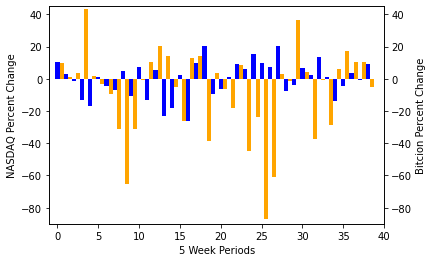

NASDAQ Percent Change:
Maximum: 20.63%
Minimum: -26.44%
Bitcoin Percent Change:
Maximum: 43.32%
Minimum: -86.97%


In [7]:
# This is our new x axis
five_week_periods = np.arange(len(nasdaq_percent_change))
width = 0.5

# Create a plot with both datasets as before, except using the bar function of pyplot this time.
fig, ax1 = plt.subplots()

ax1.bar(five_week_periods, nasdaq_percent_change, width, color='blue')
ax1.set_xlabel('5 Week Periods')
ax1.set_ylabel('NASDAQ Percent Change', color='black')
ax1.set(xlim=(-1, 40), ylim=(-90, 45))

ax2 = ax1.twinx()

ax2.set_ylabel('Bitcion Percent Change') 
ax2.bar(five_week_periods+width, bitcoin_percent_change, width, color = 'orange')  
ax2.set(xlim=(-1, 40), ylim=(-90, 45))

plt.show()

def list_details(list):
    maximum = '%.2f' % max(list)
    minimum = '%.2f' % min(list)
    print("Maximum: " + maximum + "%")
    print("Minimum: " + minimum + "%")

print("NASDAQ Percent Change:")
list_details(nasdaq_percent_change)
print("Bitcoin Percent Change:")
list_details(bitcoin_percent_change)

As we can see from the figure above, Bitcoin's range of percent changes significantly larger than NASDAQ. This is due to the highly volatile nature of the cryptocurrency market, as well as the fact that we are using a composite index of stocks which will be less volatile. This combined with the fact that the timing of the bull and bear markets are not the same make it difficult to draw comparisons and point out similarities. 

What we can gather, is that in order to run any hypothesis testing on the two charts, we should normalize the data. Normalizing the data transforms each price value into an number between 1 and 0. Then, we can accurately run a regression to see the correlation between the two.

Use the preprocessing module from sklearn to normalize prices.

In [8]:
# The sklearn preprocessing normalize function takes a list as input, so collect the close prices into a
# list.
nasdaq_price = [[nasdaq_200["Close"][index] for index in range(nasdaq_200.index.start, nasdaq_200.index.stop)]]
bitcoin_price = [[bitcoin_200["Close"][index] for index in range(bitcoin_200.index.start, bitcoin_200.index.stop)]]

# Use the preprocessing normalize function on both lists.
nasdaq_normalized = preprocessing.normalize(nasdaq_price)
bitcoin_normalized = preprocessing.normalize(bitcoin_price)

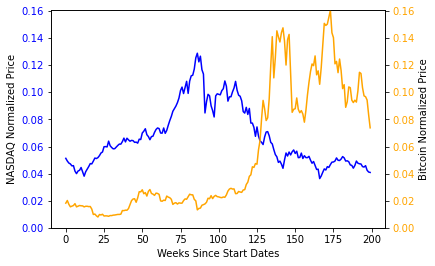

In [9]:
# Proceed as before to create the regular plot with our new normalized values.
weeks = range(0, 200)

def plot_prices(ind, dep1, dep2, ax1_ylabel, ax2_ylabel):
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('Weeks Since Start Dates')
    ax1.set_ylabel(ax1_ylabel, color='black')
    plot_1 = ax1.plot(weeks, dep1, color='blue')
    ax1.tick_params(axis ='y', labelcolor = 'blue') 

    ax2 = ax1.twinx() 

    ax2.set_ylabel(ax2_ylabel, color = 'black') 
    plot_2 = ax2.plot(weeks, dep2, color = 'orange') 
    ax2.tick_params(axis ='y', labelcolor = 'orange')    
    
    ylimit = max(max(dep1), max(dep2))
    ax1.set(ylim=(0, ylimit))
    ax2.set(ylim=(0, ylimit)) 
    
    plt.show
    
plot_prices(weeks, nasdaq_normalized[0], bitcoin_normalized[0], 'NASDAQ Normalized Price', 'Bitcoin Normalized Price')

Now let's simply adjust the timelines so that the bull runs line up. Since Bitcoin is ahead, we have to get rid of some period of data from its start. We can do this simply by playing around with the values, and seeing what matches the best. Whatever we take off from the beginning of the the bitcoin data we have to take off from the end of NASDAQ, so that the length of the independet variable set matches. 

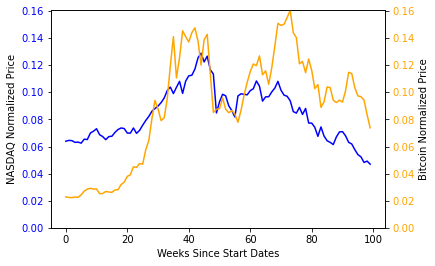

In [10]:
# Slice the values we want from each list.
# We have to index two dimensions, since normalize() returns a list within an array.
nasdaq_adj_time = nasdaq_normalized[0][42:142]
bitcoin_adj_time = bitcoin_normalized[0][100:200]

weeks = range(0, 100)

plot_prices(weeks, nasdaq_adj_time, bitcoin_adj_time, 'NASDAQ Normalized Price', 'Bitcoin Normalized Price')

Now we start to see some similarities! The two charts clearly have multiple peaks, roughly 4 that all seem to happen at the same intervals. Let's try to see if there is any statistical significance to the data. 

<h1>3. Hypothesis Testing </h1>
Lets run a polynomial regression on the data. This will show the trend in price movement that is common between both charts. We can then get a score from that trend prediction to see how accurate it is to the data. The closer to 1 the score is, the better the correlation is. We can use this as our test of significance of the similarities between the two bubbles. Because we see 4 peaks, lets first try a degree 4 polynomial as a guess to fit the data.

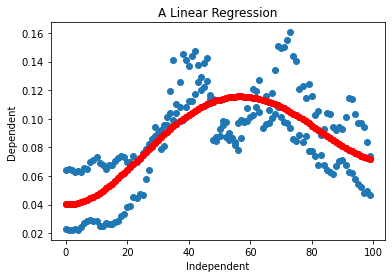

In [84]:
# Populate the indepndent variable list to use in our linear model. 
# We have to concatente two lists as we have two sets of data.
r = range(0, 100)
weeks = [ [i] for i in r ] + [ [i] for i in r]

# Concatenate the price lists.
prices = nasdaq_adj_time.tolist() + bitcoin_adj_time.tolist()

lm = linear_model.LinearRegression()

# Set the polynomial features desired degree.
pm = PolynomialFeatures(degree=4)
# The fit_transform function adjusts the dimensions of the 
# independet variable to accomodate the degree of regression selected.
pm_weeks = pm.fit_transform(weeks)
lm.fit(pm_weeks, prices)

# Make the prediction and plot along with the data.
pm_prediction = lm.predict(pm_weeks)
fig, ax = plt.subplots()
    
ax.scatter(weeks, prices)
ax.set_xlabel("Weeks")
ax.set_ylabel("Normalized Price")
ax.set_title("NASDAQ x Bitcoin Degree 4 Regression")
    
ax.scatter(weeks, pm_prediction, color='red')

In [85]:
print("Degree 4 polynomial regression score:")
print(lm.score(pm_weeks, prices))

Degree 4 polynomial regression score:
0.5625489276217441


We see the that the trend follows the general path of the data, mainly that the prices rice and fall. However a degree 4 polynomial doesn't seem to fully represent what happened. The score seen above is roughly 0.56. This shows some correlation but it is not strong. Lets play around with a few different degree polynomials to see what fits best.

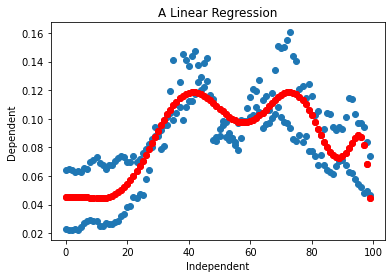

In [86]:
pm = PolynomialFeatures(degree=10)
pm_weeks = pm.fit_transform(weeks)
lm.fit(pm_weeks, prices)

pm_prediction = lm.predict(pm_weeks)
fig, ax = plt.subplots()
    
ax.scatter(weeks, prices)
ax.set_xlabel("Weeks")
ax.set_ylabel("Normalized Price")
ax.set_title("NASDAQ x Bitcoin Degree 10 Regression")
    
ax.scatter(weeks, pm_prediction, color='red')

In [87]:
print("Degree 10 polynomial regression score:")
print(lm.score(pm_weeks, prices))

Degree 10 polynomial regression score:
0.6687343858575112


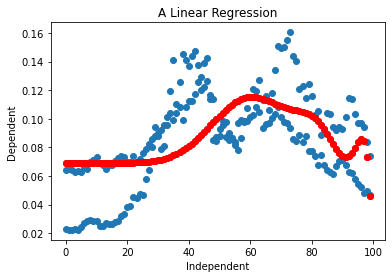

In [88]:
pm = PolynomialFeatures(degree=15)
pm_weeks = pm.fit_transform(weeks)
lm.fit(pm_weeks, prices)

pm_prediction = lm.predict(pm_weeks)
fig, ax = plt.subplots()
    
ax.scatter(weeks, prices)
ax.set_xlabel("Weeks")
ax.set_ylabel("Normalized Price")
ax.set_title("NASDAQ x Bitcoin Degree 15 Regression")
    
ax.scatter(weeks, pm_prediction, color='red')

In [89]:
print("Degree 15 polynomial regression score:")
print(lm.score(pm_weeks, prices))

Degree 15 polynomial regression score:
0.30159543417243384


As we can see, it appears that the best score we can get is roughly 0.67 with a degree 10 polynomial. This shows that there are some similarities, but not enough to call it statistically significant. For this reason, we can reject our hypothesis that that the stock market and crypto bubbles are similar.

<h1> 4. Insights </h1>

Unfortunately, we cannot find any statistical significance between the pricing of the bubbles of the crypto and stock market. However, this does not mean investors cannot learn anything from this. If the two bubbles are not similar, then this implies that the crypto market may not crash as severely as the stock market did. Looking ahead at the next few weeks, this may mean that this is a good opportunity to buy some crypto.

Still, a lesson to learn from the dot com bubble is to stick with the projects that have real value to them. Do not invest in a crypto currency simply because it has 'hype' around it. This will protect investors from the mistakes that caused the severe rise and fall of the stock market during the dot com bubble.

If I were to do this again, I might make my own composite index of crypto currencies to compare with. This would offer a better point of comparison, since the overall volatility would be reduced and better match the NASDAQ. I could also explore some other aspects of the data such as volume, market capitalization and more. 